# Support Vector Machines

## 1. Social Network Ads 

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

1. Importa las librerías necesarias y carga el dataset.

In [5]:
import pandas as pd

data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

In [3]:
X=data[['Age','EstimatedSalary']]
y=data['Purchased']

3. Separa los datos de entrenamiento de los datos de prueba.

4. Estandariza los datos (`StandardScaler`).

In [10]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(X)
X_scaled=Scaler.transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf=SVC(C=0.1,kernel='linear',gamma='auto')
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
A_train=accuracy_score(y_pred_train,y_train)
A_test=accuracy_score(y_pred_test,y_test)
print(A_train,A_test)

0.9428571428571428 1.0


6. Realiza las predicciones sobre los datos de prueba.

7. Visualiza los resultados mediante:
 
* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_test))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



**Para probar:**
1. Modifica el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el mismo y su performance. Por ejemplo, prueba con con los siguientes kernels: `rbf`, `poly` y `sigmoid`.
2. ¿Cuál es la función del parámetro `Gamma`?
3. Repite el ejercicio 1, modificando los valores de `Gamma`
4. Modifica el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 


## 2. Manos a la obra: Kernel + SVM

En base a todo lo visto en anteriormente, vamos a aplicar SVM al dataset `DS_Clase_04_iris.csv` ¿Cuantas clases tiene este dataset? ¿Es un problema multiclase? 

**Para investigar:** ¿Qué función cumple el parámetro `decision_function_shape` de la función SVC de scikit-learn?

**Ejercicios:**

1. Implementa 3 clasificadores SVM con Kernels: `Polinómico`, `Gaussiano` y `Sigmoide`
2. Realiza la matriz de confusión y el reporte de clasificación para cada kernel.
3. ¿Qué Kernel produce los mejores resultados?


`Tip:` Utilizando el código visto al comienzo de la notebook, podés crear funciones que te permitan graficar la matriz de confusión y los límites de clasificación, sin tener que copiar y pegar todo el código.

In [7]:
import pandas as pd
data1=pd.read_csv('DS_Bitácora_04_Iris.csv')
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


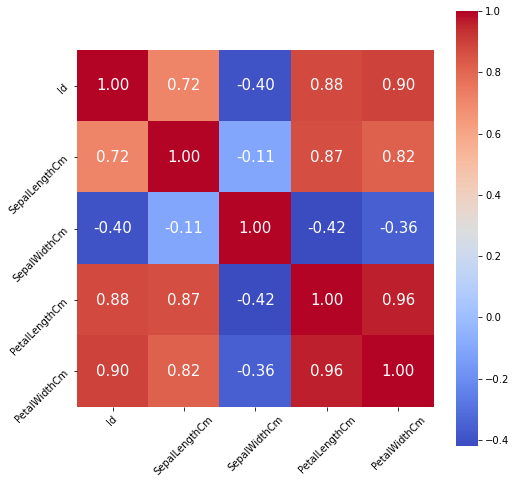

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import RandomizedSearchCV
corr = data1.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
X=data1[['PetalWidthCm','PetalLengthCm','SepalLengthCm']]
y=data1['Species']

In [10]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(X)
X_scaled=Scaler.transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [14]:
clf=SVC()

In [15]:
param_dist = {'C':sp.stats.randint(0.01, 20),
              'kernel': ['linear', 'poly','rbf','sigmoid']}

In [16]:
model = RandomizedSearchCV(clf, param_dist,n_iter=100, random_state=0, cv=5)

In [17]:
model.fit(X_train, y_train)

C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Thomas Mir Mercere\miniconda3\lib\site-packages\

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F19DACE040>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=0)

In [18]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'C': 9, 'kernel': 'linear'}
Mejor Score: 0.9523809523809523



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00160,0.00049,0.00140,0.00049,12,sigmoid,"{'C': 12, 'kernel': 'sigmoid'}",0.71429,0.85714,0.52381,0.80952,0.66667,0.71429,0.11664,76
1,0.00159,0.00049,0.00000,0.00000,0,sigmoid,"{'C': 0, 'kernel': 'sigmoid'}",nan,nan,nan,nan,nan,nan,nan,92
2,0.00140,0.00049,0.00120,0.00040,3,sigmoid,"{'C': 3, 'kernel': 'sigmoid'}",0.71429,0.85714,0.66667,0.80952,0.76190,0.76190,0.06734,71
3,0.00179,0.00040,0.00140,0.00080,9,sigmoid,"{'C': 9, 'kernel': 'sigmoid'}",0.71429,0.85714,0.57143,0.80952,0.66667,0.72381,0.10169,74
4,0.00199,0.00063,0.00080,0.00040,18,linear,"{'C': 18, 'kernel': 'linear'}",0.95238,0.90476,0.90476,1.00000,0.95238,0.94286,0.03563,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00160,0.00080,0.00080,0.00075,16,linear,"{'C': 16, 'kernel': 'linear'}",0.95238,0.90476,0.90476,1.00000,0.95238,0.94286,0.03563,7
96,0.00160,0.00049,0.00060,0.00049,14,poly,"{'C': 14, 'kernel': 'poly'}",0.90476,0.90476,0.85714,1.00000,0.95238,0.92381,0.04856,59
97,0.00159,0.00048,0.00080,0.00040,16,linear,"{'C': 16, 'kernel': 'linear'}",0.95238,0.90476,0.90476,1.00000,0.95238,0.94286,0.03563,7
98,0.00120,0.00040,0.00060,0.00049,19,poly,"{'C': 19, 'kernel': 'poly'}",0.90476,0.90476,0.95238,1.00000,0.95238,0.94286,0.03563,7


In [19]:
prediction = model.predict(X_test)

In [23]:
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [24]:
scores.sort_values('mean_test_score').tail(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.00159,0.00049,0.00000,0.00000,0,sigmoid,"{'C': 0, 'kernel': 'sigmoid'}",nan,nan,nan,nan,nan,nan,nan,92
16,0.00099,0.00000,0.00000,0.00000,0,rbf,"{'C': 0, 'kernel': 'rbf'}",nan,nan,nan,nan,nan,nan,nan,100
21,0.00139,0.00049,0.00000,0.00000,0,poly,"{'C': 0, 'kernel': 'poly'}",nan,nan,nan,nan,nan,nan,nan,94
23,0.00120,0.00040,0.00000,0.00000,0,sigmoid,"{'C': 0, 'kernel': 'sigmoid'}",nan,nan,nan,nan,nan,nan,nan,95
28,0.00160,0.00049,0.00000,0.00000,0,linear,"{'C': 0, 'kernel': 'linear'}",nan,nan,nan,nan,nan,nan,nan,99
39,0.00100,0.00063,0.00000,0.00000,0,rbf,"{'C': 0, 'kernel': 'rbf'}",nan,nan,nan,nan,nan,nan,nan,93
56,0.00120,0.00040,0.00000,0.00000,0,poly,"{'C': 0, 'kernel': 'poly'}",nan,nan,nan,nan,nan,nan,nan,96
63,0.00139,0.00049,0.00000,0.00000,0,rbf,"{'C': 0, 'kernel': 'rbf'}",nan,nan,nan,nan,nan,nan,nan,98
77,0.00120,0.00040,0.00000,0.00000,0,rbf,"{'C': 0, 'kernel': 'rbf'}",nan,nan,nan,nan,nan,nan,nan,91
78,0.00120,0.00040,0.00000,0.00000,0,rbf,"{'C': 0, 'kernel': 'rbf'}",nan,nan,nan,nan,nan,nan,nan,97
